<a href="https://colab.research.google.com/github/jaradamiak/Deep_Learning/blob/main/TensorFlow1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print("tensorflow version:", tf.__version__)
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


tensorflow version: 2.12.0


# Input and preprocessing

In [ ]:
cols = ['sepal_length', ' sepal_width', 'petal_length', 'petal_width', 'class']
# url = 'https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv'
# iris = pd.read_csv(url)
# print(iris.head())
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=cols)
print(df.head())

   sepal_length   sepal_width  petal_length  petal_width        class
0           5.1           3.5           1.4          0.2  Iris-setosa
1           4.9           3.0           1.4          0.2  Iris-setosa
2           4.7           3.2           1.3          0.2  Iris-setosa
3           4.6           3.1           1.5          0.2  Iris-setosa
4           5.0           3.6           1.4          0.2  Iris-setosa


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])
print(df.head())

   sepal_length   sepal_width  petal_length  petal_width  class
0           5.1           3.5           1.4          0.2      0
1           4.9           3.0           1.4          0.2      0
2           4.7           3.2           1.3          0.2      0
3           4.6           3.1           1.5          0.2      0
4           5.0           3.6           1.4          0.2      0


In [ ]:
# convert dataset to numpy array
np_df = df.to_numpy()
print(np_df[0:5, :])

[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]]


In [ ]:
# separate features and target
X = np_df[:,:-1]
print("features:", X[0:5,:], sep="\n")
y=np_df[:,-1]
print("target:", y[0:5], sep="\n")

features:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
target:
[0. 0. 0. 0. 0.]


In [ ]:
# create a standard scaler that fits on the input data
scaler = StandardScaler().fit(X)

In [ ]:
#scale the numeric features
X = scaler.transform(X)

In [ ]:
# convert target variables as one-hot array
y = tf.keras.utils.to_categorical(y,3)

In [ ]:
print("features:", X[0:5,:], sep="\n")
print("target:", y[0:5], sep="\n")


features:
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]
target:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(135, 4) (15, 4) (135, 3) (15, 3)


# Training the model

In [ ]:
from tensorflow import keras
# number of classes in target variable
NB_CLASSES = 3
# create a sequential model in keras
model = tf.keras.models.Sequential()
# first hidden layer
model.add(keras.layers.Dense(128, input_shape=(4,), name='Hidden_layer_1', activation='relu'))
# second hidden layer
model.add(keras.layers.Dense(128, name='Hidden_layer_2', activation='relu'))
# output layer
model.add(keras.layers.Dense(NB_CLASSES, name='Output_layer', activation='softmax'))
# compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer_1 (Dense)      (None, 128)               640       
                                                                 
 Hidden_layer_2 (Dense)      (None, 128)               16512     
                                                                 
 Output_layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


# Evaluating

In [ ]:
VERBOSE = 1
BATCH_SIZE = 16
EPOCHS = 10
VALIDATION_SPLIT = 0.2
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/10
7/7 [==============================] - 0s 24ms/step - loss: 0.9448 - accuracy: 0.5926 - val_loss: 0.7414 - val_accuracy: 0.7037
Epoch 2/10
7/7 [==============================] - 0s 5ms/step - loss: 0.5898 - accuracy: 0.7778 - val_loss: 0.5691 - val_accuracy: 0.8148
Epoch 3/10
7/7 [==============================] - 0s 4ms/step - loss: 0.4628 - accuracy: 0.8148 - val_loss: 0.4794 - val_accuracy: 0.8148
Epoch 4/10
7/7 [==============================] - 0s 4ms/step - loss: 0.3919 - accuracy: 0.8333 - val_loss: 0.4176 - val_accuracy: 0.8148
Epoch 5/10
7/7 [==============================] - 0s 6ms/step - loss: 0.3458 - accuracy: 0.8333 - val_loss: 0.3662 - val_accuracy: 0.8889
Epoch 6/10
7/7 [==============================] - 0s 5ms/step - loss: 0.3154 - accuracy: 0.8704 - val_loss: 0.3284 - val_accuracy: 0.8889
Epoch 7/10
7/7 [==============================] - 0s 4ms/step - loss: 0.2874 - accuracy: 0.8704 - val_loss: 0.3020 - val_accuracy: 0.8889
Epoch 8/10
7/7 [=================

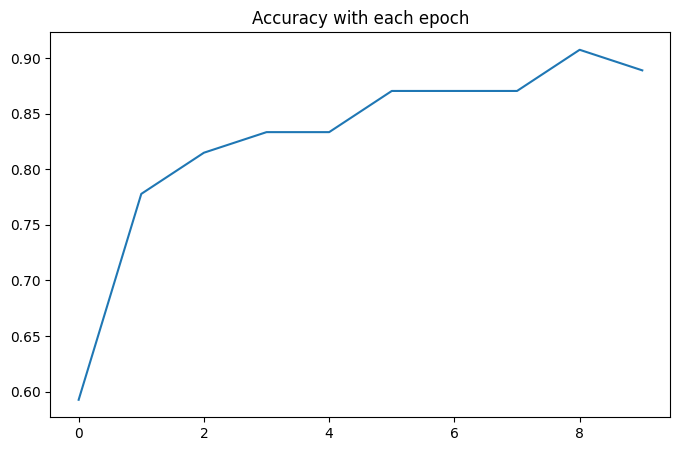

1/1 [==============================] - 0s 20ms/step - loss: 0.1348 - accuracy: 1.0000


[0.13483868539333344, 1.0]

In [ ]:
pd.DataFrame(history.history)['accuracy'].plot(figsize=(8,5))
plt.title('Accuracy with each epoch')
plt.show()
# evaluate against test set
model.evaluate(X_test, y_test)


In [ ]:
model.save('iris_save')
loaded_model = keras.models.load_model('iris_save')
loaded_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer_1 (Dense)      (None, 128)               640       
                                                                 
 Hidden_layer_2 (Dense)      (None, 128)               16512     
                                                                 
 Output_layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


# Predictions

In [ ]:
prediction_input = [[6.6, 3.0, 4.4, 1.4]]
scaled_input = scaler.transform(prediction_input)
raw_prediction = model.predict(scaled_input)
print('raw prediction (probabilities for each class):', raw_prediction)
prediction = np.argmax(raw_prediction)
print('prediction is:', label_encoder.inverse_transform([prediction]))

1/1 [==============================] - 0s 14ms/step
raw prediction (probabilities for each class): [[0.021647   0.6243073  0.35404578]]
prediction is: ['Iris-versicolor']
